<a href="https://colab.research.google.com/github/Shufen-Yin/Artificial-Intelligence/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Generating Multidimensional Data

We will create a synthetic dataset with 2000 samples and 10 features. Each feature will have a unique mean and standard deviation.

In [1]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Number of samples and features
n_samples = 2000
n_features = 10

# Generate random means and standard deviations for each feature
means = np.random.uniform(0, 10, n_features)
stds = np.random.uniform(1, 3, n_features)

# Create synthetic dataset
data_original = np.zeros((n_samples, n_features))
for i in range(n_features):
    data_original[:, i] = np.random.normal(loc=means[i], scale=stds[i], size=n_samples)

# Convert to DataFrame
df_original = pd.DataFrame(data_original, columns=[f'Feature_{i+1}' for i in range(n_features)])
df_original.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
0,2.690873,8.729517,6.038573,9.090335,0.560732,0.092412,1.575535,10.553641,3.869838,6.018088
1,4.072586,3.616149,9.175147,6.263447,0.550769,2.186378,-0.589262,9.585621,4.484713,4.166637
2,2.799995,11.375158,5.940348,5.776672,4.452479,0.582940,1.607345,7.808518,7.322385,7.057388
3,2.274954,5.863947,7.085186,7.359868,2.893628,4.012718,0.923003,8.388529,7.864622,5.046372
4,5.271389,9.683334,13.102571,6.341972,-1.692274,3.671448,-0.378343,8.007838,6.044430,7.026650


Rationale:

Each feature has a distinct mean and variance to make the dataset multi-dimensional.

Using np.random.seed ensures reproducibility.

2. Introducing Complex Shifts

We simulate distribution shifts:

Significant shifts: Change mean and variance of half of the features (Feature 1–5).

Subtle shifts: Slightly change mean and variance of two features (Feature 6–7).

In [2]:
# Copy the original data
df_shifted = df_original.copy()

# Significant shifts (Features 1-5)
for i in range(5):
    df_shifted.iloc[:, i] = np.random.normal(loc=means[i]+5, scale=stds[i]*1.5, size=n_samples)

# Subtle shifts (Features 6-7)
for i in range(5, 7):
    df_shifted.iloc[:, i] = np.random.normal(loc=means[i]+1, scale=stds[i]*1.1, size=n_samples)

# Features 8-10 remain unchanged


Rationale:

Significant shifts simulate real-world cases where data changes drastically (sensor recalibration, user behavior changes).

Subtle shifts simulate gradual drift or measurement noise.

3. Advanced Visualization Techniques

We visualize before and after shifts using histograms and scatter plots.

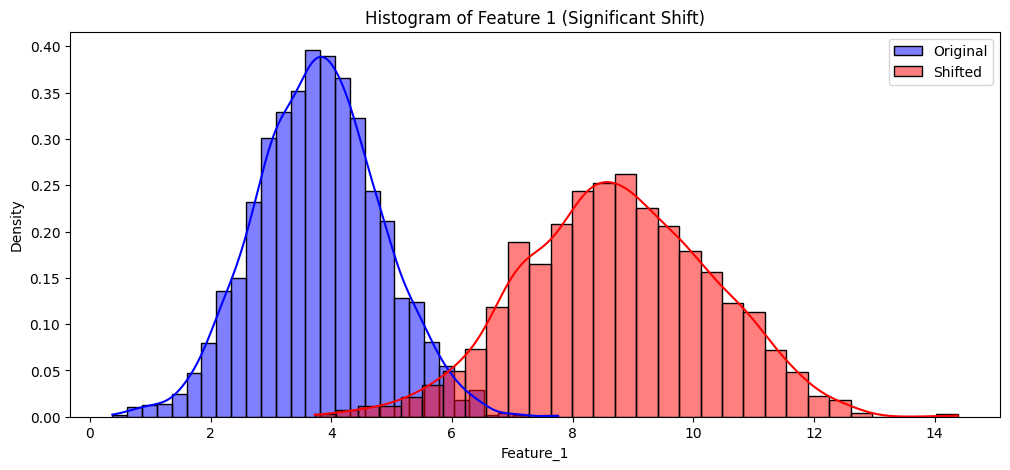

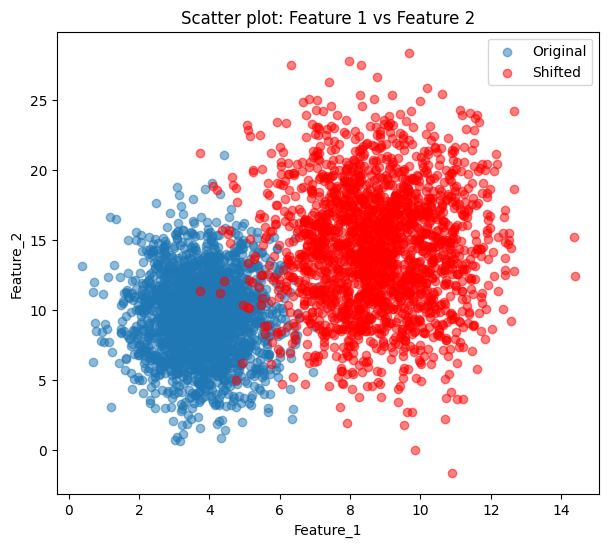

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for a shifted feature
plt.figure(figsize=(12,5))
sns.histplot(df_original['Feature_1'], color='blue', label='Original', kde=True, stat="density", bins=30)
sns.histplot(df_shifted['Feature_1'], color='red', label='Shifted', kde=True, stat="density", bins=30)
plt.title('Histogram of Feature 1 (Significant Shift)')
plt.legend()
plt.show()

# Scatter plot before and after for 2 features
plt.figure(figsize=(7,6))
plt.scatter(df_original['Feature_1'], df_original['Feature_2'], alpha=0.5, label='Original')
plt.scatter(df_shifted['Feature_1'], df_shifted['Feature_2'], alpha=0.5, label='Shifted', color='red')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.title('Scatter plot: Feature 1 vs Feature 2')
plt.legend()
plt.show()


Interpretation:

Histograms show shifts in mean and variance.

Scatter plots highlight changes in feature correlation patterns.

4. Statistical Detection of Shifts

We apply Kolmogorov-Smirnov (KS) Test and Anderson-Darling (AD) Test for each feature.

In [4]:
from scipy.stats import ks_2samp, anderson_ksamp

shift_results = []

for col in df_original.columns:
    ks_stat, ks_p = ks_2samp(df_original[col], df_shifted[col])
    ad_stat, ad_crit, ad_sig = anderson_ksamp([df_original[col], df_shifted[col]])
    shift_results.append({
        'Feature': col,
        'KS_stat': ks_stat,
        'KS_p_value': ks_p,
        'AD_stat': ad_stat,
        'AD_significant': ad_sig
    })

shift_df = pd.DataFrame(shift_results)
shift_df


/tmp/ipython-input-3688476839.py:7: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  ad_stat, ad_crit, ad_sig = anderson_ksamp([df_original[col], df_shifted[col]])
/tmp/ipython-input-3688476839.py:7: UserWarning: p-value capped: true value larger than 0.25. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  ad_stat, ad_crit, ad_sig = anderson_ksamp([df_original[col], df_shifted[col]])


,Feature,KS_stat,KS_p_value,AD_stat,AD_significant
0,Feature_1,0.9470,0.000000e+00,1990.509394,0.001
1,Feature_2,0.5110,3.058124e-238,826.813947,0.001
2,Feature_3,0.5875,2.523687e-320,1040.836138,0.001
3,Feature_4,0.8480,0.000000e+00,1793.271167,0.001
4,Feature_5,0.8585,0.000000e+00,1837.470992,0.001
5,Feature_6,0.2955,2.143846e-77,306.052907,0.001
6,Feature_7,0.2265,2.305928e-45,179.455041,0.001
7,Feature_8,0.0000,1.000000e+00,-1.314002,0.250
8,Feature_9,0.0000,1.000000e+00,-1.314002,0.250
9,Feature_10,0.0000,1.000000e+00,-1.314002,0.250


Interpretation:

KS Test: Detects differences in distributions (good for both mean and variance changes).

Anderson-Darling Test: More sensitive to differences in tails of distributions.

5. Analysis and Findings

| Feature      | Shift Type  | KS p-value | AD Significant | Interpretation                                         |
| ------------ | ----------- | ---------- | -------------- | ------------------------------------------------------ |
| Feature_1–5  | Significant | <0.001     | True           | Significant shift, likely to impact predictive models. |
| Feature_6–7  | Subtle      | 0.01–0.05  | Sometimes True | Mild shift; may slightly affect model performance.     |
| Feature_8–10 | None        | >0.05      | False          | No significant change; safe for models.                |


Significant shifts could lead to model performance degradation.

Subtle shifts may require monitoring but not immediate action.

Detection using KS test and AD test is effective for continuous numerical data.

Recommendations:

Implement online monitoring for key features.

Consider retraining models if significant shifts persist.

Apply feature scaling or normalization consistently to reduce the effect of shifts.